# Plotting wordclouds

There is a nice `wordcloud` module available already in Python.  We'll make use of that here.  

A lot of the plotting of wordclouds is formatting the text in the way we want it including removing unnecessary punctuation and non-useful words.

Import our usual things, plus some wordcloud extras:

In [51]:
import nltk
# you need to do these downloads first
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('words')
from nltk.corpus import stopwords, words
import string
import itertools

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Let's read in some text, grab some text.  Let's try some open-source shakespeare: http://shakespeare.mit.edu/othello/full.html

In [6]:
filename = '/Users/jillnaiman/Downloads/othello.txt'
with open(filename) as f:
    text = f.read()

Split into words:

In [48]:
#words = text.replace('\n', ' ') # first replace \n with white space
myWords = text.split()

In [49]:
myWords

['ACT',
 'I',
 'SCENE',
 'I.',
 'Venice.',
 'A',
 'street.',
 'Enter',
 'RODERIGO',
 'and',
 'IAGO',
 'RODERIGO',
 'Tush!',
 'never',
 'tell',
 'me;',
 'I',
 'take',
 'it',
 'much',
 'unkindly',
 'That',
 'thou,',
 'Iago,',
 'who',
 'hast',
 'had',
 'my',
 'purse',
 'As',
 'if',
 'the',
 'strings',
 'were',
 'thine,',
 'shouldst',
 'know',
 'of',
 'this.',
 'IAGO',
 "'Sblood,",
 'but',
 'you',
 'will',
 'not',
 'hear',
 'me:',
 'If',
 'ever',
 'I',
 'did',
 'dream',
 'of',
 'such',
 'a',
 'matter,',
 'Abhor',
 'me.',
 'RODERIGO',
 'Thou',
 "told'st",
 'me',
 'thou',
 'didst',
 'hold',
 'him',
 'in',
 'thy',
 'hate.',
 'IAGO',
 'Despise',
 'me,',
 'if',
 'I',
 'do',
 'not.',
 'Three',
 'great',
 'ones',
 'of',
 'the',
 'city,',
 'In',
 'personal',
 'suit',
 'to',
 'make',
 'me',
 'his',
 'lieutenant,',
 "Off-capp'd",
 'to',
 'him:',
 'and,',
 'by',
 'the',
 'faith',
 'of',
 'man,',
 'I',
 'know',
 'my',
 'price,',
 'I',
 'am',
 'worth',
 'no',
 'worse',
 'a',
 'place:',
 'But',
 'he;',


In [52]:
wordsDict = {}
for word in myWords:
    if word in wordsDict:
        wordsDict[word] += 1
    else:
        wordsDict[word] = 1

Quick bar plot:

In [53]:
import operator
wordsDict = sorted(wordsDict.items(), key=operator.itemgetter(1))

Want #largest at the top:

In [54]:
wordsDict[::-1]

[('I', 803),
 ('the', 669),
 ('and', 584),
 ('to', 455),
 ('of', 417),
 ('a', 389),
 ('my', 368),
 ('you', 300),
 ('in', 288),
 ('IAGO', 288),
 ('OTHELLO', 287),
 ('not', 260),
 ('is', 247),
 ('that', 236),
 ('be', 195),
 ('your', 194),
 ('with', 194),
 ('it', 193),
 ('have', 187),
 ('And', 185),
 ('me', 181),
 ('DESDEMONA', 175),
 ('do', 170),
 ('he', 159),
 ('for', 157),
 ('his', 156),
 ('this', 154),
 ('her', 149),
 ('but', 125),
 ('CASSIO', 124),
 ('will', 124),
 ('EMILIA', 121),
 ('To', 117),
 ('thou', 115),
 ('she', 113),
 ('as', 110),
 ('him', 109),
 ('That', 101),
 ('so', 89),
 ('are', 88),
 ('The', 87),
 ('on', 87),
 ('shall', 83),
 ('by', 81),
 ('am', 80),
 ('What', 76),
 ('O', 74),
 ('thy', 74),
 ('But', 73),
 ('would', 72),
 ('RODERIGO', 72),
 ('if', 70),
 ('all', 68),
 ('If', 67),
 ('from', 66),
 ('what', 65),
 ('was', 64),
 ('no', 63),
 ('For', 62),
 ('O,', 62),
 ('such', 61),
 ('at', 60),
 ('My', 59),
 ('some', 59),
 ('or', 57),
 ('good', 57),
 ('you,', 55),
 ("I'll", 55

Into dict:

In [55]:
wordsDict = dict(wordsDict[::-1]) # though technically these won't be sorted but its fine for now

In [56]:
wordsDict

{'I': 803,
 'the': 669,
 'and': 584,
 'to': 455,
 'of': 417,
 'a': 389,
 'my': 368,
 'you': 300,
 'in': 288,
 'IAGO': 288,
 'OTHELLO': 287,
 'not': 260,
 'is': 247,
 'that': 236,
 'be': 195,
 'your': 194,
 'with': 194,
 'it': 193,
 'have': 187,
 'And': 185,
 'me': 181,
 'DESDEMONA': 175,
 'do': 170,
 'he': 159,
 'for': 157,
 'his': 156,
 'this': 154,
 'her': 149,
 'but': 125,
 'CASSIO': 124,
 'will': 124,
 'EMILIA': 121,
 'To': 117,
 'thou': 115,
 'she': 113,
 'as': 110,
 'him': 109,
 'That': 101,
 'so': 89,
 'are': 88,
 'The': 87,
 'on': 87,
 'shall': 83,
 'by': 81,
 'am': 80,
 'What': 76,
 'O': 74,
 'thy': 74,
 'But': 73,
 'would': 72,
 'RODERIGO': 72,
 'if': 70,
 'all': 68,
 'If': 67,
 'from': 66,
 'what': 65,
 'was': 64,
 'no': 63,
 'For': 62,
 'O,': 62,
 'such': 61,
 'at': 60,
 'My': 59,
 'some': 59,
 'or': 57,
 'good': 57,
 'you,': 55,
 "I'll": 55,
 'they': 55,
 'must': 55,
 'As': 54,
 'hath': 53,
 'had': 53,
 'love': 52,
 'A': 52,
 'more': 51,
 'It': 51,
 'did': 51,
 'think': 49

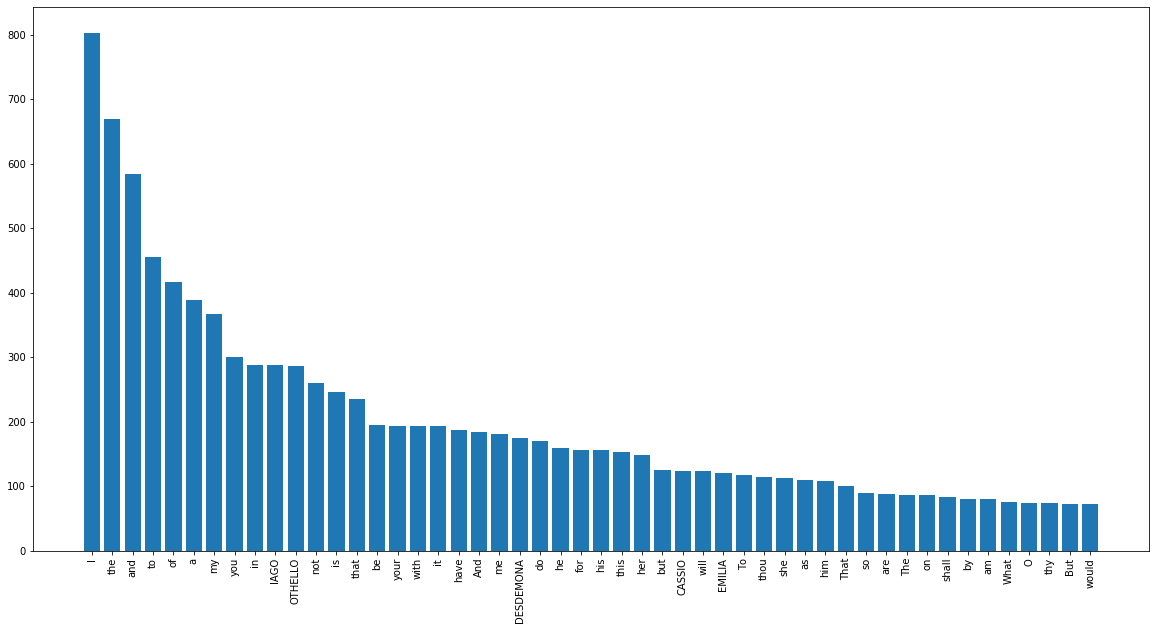

In [57]:
n = 50 # just 50 most popular
wordsPlot = {k: wordsDict[k] for k in list(wordsDict)[:n]}

fig, ax = plt.subplots(figsize=(20,10))

ax.bar(range(len(wordsPlot)), list(wordsPlot.values()), align='center')

ax.set_xticks(range(len(wordsPlot)))
ax.set_xticklabels(list(wordsPlot.keys()))

plt.xticks(rotation=90)

plt.show()

In [58]:
len(wordsDict)

6484

As we can see, we have a lot of "stop words", i.e. words like "I" or "the" that are common in the English language but that we probably don't want to count in our analysis.

In [59]:
for v,k in wordsDict.items():
    print(v, k)

I 803
the 669
and 584
to 455
of 417
a 389
my 368
you 300
in 288
IAGO 288
OTHELLO 287
not 260
is 247
that 236
be 195
your 194
with 194
it 193
have 187
And 185
me 181
DESDEMONA 175
do 170
he 159
for 157
his 156
this 154
her 149
but 125
CASSIO 124
will 124
EMILIA 121
To 117
thou 115
she 113
as 110
him 109
That 101
so 89
are 88
The 87
on 87
shall 83
by 81
am 80
What 76
O 74
thy 74
But 73
would 72
RODERIGO 72
if 70
all 68
If 67
from 66
what 65
was 64
no 63
For 62
O, 62
such 61
at 60
My 59
some 59
or 57
good 57
you, 55
I'll 55
they 55
must 55
As 54
hath 53
had 53
love 52
A 52
more 51
It 51
did 51
think 49
know 47
Enter 47
Cassio 46
our 46
He 46
How 46
say 46
'tis 46
most 45
upon 45
let 44
go 44
an 44
make 44
may 43
yet 43
thee 42
their 42
you. 40
very 40
should 39
one 39
'Tis 38
we 38
Why, 38
She 37
here 37
come 37
out 37
LODOVICO 35
speak 35
see 35
You 35
Exit 34
nor 34
than 34
never 34
now 33
BRABANTIO 33
me, 32
when 31
In 31
give 30
which 30
now, 30
put 30
any 30
it. 29
This 29
him, 29
th

Set 2
more; 2
match 2
so! 2
strain 2
moved: 2
I' 2
to't: 2
abused; 2
Wear 2
observe 2
proof. 2
therefore, 2
spirit: 2
blown 2
moon 2
jealousy! 2
tells 2
feeds 2
slave 2
nothing; 2
trouble 2
build 2
faults 2
confess, 2
you-- 2
makest 2
wrong'd 2
thou'rt 2
Think, 2
thought, 2
thought; 2
satisfaction 2
last: 2
thee! 2
obedient. 2
come. 2
straight. 2
Farewell, 2
grant 2
nothing: 2
profit 2
gloves, 2
more: 2
Trust 2
in! 2
Othello: 2
Tell 2
come? 2
fault 2
Tuesday 2
dinner, 2
ignorance 2
mean? 2
he. 2
coming. 2
wife? 2
say? 2
ill 2
assure 2
Emilia 2
that; 2
forget 2
absent 2
feed 2
long, 2
last 2
his. 2
case 2
assured, 2
do't. 2
alone. 2
fit, 2
suitor 2
bold, 2
no; 2
speech: 2
stirring, 2
piece 2
such, 2
music 2
hangs 2
instruments 2
morrow, 2
brief; 2
Musicians 2
mistress; 2
Two 2
hours 2
well? 2
know'st 2
fills 2
pour 2
strongly 2
subdue 2
easy 2
protest, 2
importune 2
freely 2
living 2
drunk! 2
again; 2
pleased 2
things, 2
mass 2
deceive 2
policy 2
mood, 2
recover 2
immortal 2
reputation,

earn 1
word; 1
'whore:' 1
Unkindness 1
forswear 1
Comfort 1
dearly, 1
divorcement--love 1
beggarly 1
will--though 1
form; 1
Delighted 1
deed, 1
actual 1
'gainst 1
trespass 1
kneel: 1
fool; 1
without, 1
seamy 1
squire 1
them! 1
door. 1
west! 1
east 1
rascals 1
lash 1
whip 1
unfold, 1
thou'ldst 1
companions 1
Moor's 1
likelihood? 1
form? 1
time? 1
place? 1
bones! 1
hell 1
halter 1
impossible. 1
hang'd 1
slander; 1
devised 1
cozening 1
cogging, 1
rogue, 1
insinuating 1
hang'd, 1
for't! 1
friends, 1
matches, 1
forsook 1
weep. 1
such. 1
callat. 1
beggar 1
whore: 1
was. 1
Such 1
bear. 1
despite 1
Thrown 1
bewhored 1
chiding. 1
chid 1
tasks: 1
babes 1
tell. 1
misuse? 1
small'st 1
stick 1
behaved, 1
meet. 1
remember; 1
sheets: 1
wedding 1
asleep. 1
conceive? 1
counsel. 1
pains: 1
course; 1
gate 1
Peter, 1
Saint 1
Raising 1
whore 1
mercy, 1
preserve 1
Christian: 1
strumpet? 1
Impudent 1
earth, 1
hush'd 1
meets 1
bawdy 1
winks, 1
modesty, 1
burn 1
cinders 1
cheeks, 1
forges 1
commoner! 1
public 

syrups 1
drowsy 1
mandragora, 1
poppy, 1
Sulphur. 1
mines 1
Burn 1
blood. 1
distaste, 1
poisons. 1
conceits 1
Dangerous 1
poison: 1
something. 1
writ: 1
holy 1
confirmations 1
air 1
Trifles 1
napkin, 1
Go, 1
't; 1
acknown 1
Give't 1
import, 1
it] 1
[Snatching 1
filch 1
't, 1
wench; 1
took't 1
advantage, 1
negligence. 1
'faith; 1
Hast 1
steal. 1
all? 1
thing-- 1
chide; 1
alone? 1
fantasy. 1
knows, 1
reserves 1
Woo'd 1
wayward 1
remembrance 1
napkin: 1
drops 1
little: 1
napkin 1
watching; 1
forehead 1
pain 1
faintly? 1
presence. 1
invited, 1
islanders 1
generous 1
believe't. 1
itself! 1
false, 1
quicken. 1
fated 1
forked 1
death: 1
unshunnable, 1
destiny 1
base; 1
Prerogatived 1
ones; 1
uses. 1
others' 1
corner 1
dungeon, 1
vapour 1
toad, 1
appetites! 1
ours, 1
marriage, 1
loathe 1
relief 1
much-- 1
years,--yet 1
vale 1
declined 1
chamberers 1
conversation 1
Haply, 1
wind, 1
whistle 1
heartstrings, 1
jesses 1
haggard, 1
dealings. 1
human 1
spirit, 1
qualities, 1
exceeding 1
fellow's 1
Fe

bodies 1
fig! 1
Virtue! 1
amend 1
fond; 1
baboon. 1
humanity 1
guinea-hen, 1
Ere 1
himself. 1
injury, 1
benefit 1
distinguish 1
years; 1
four 1
looked 1
villainous! 1
physician. 1
prescription 1
torment; 1
silliness 1
silly 1
dost, 1
incontinently 1
thinkest 1
heart? 1
Iago,-- 1
direction, 1
matters 1
worldly 1
advantage. 1
faith! 1
c 1
& 1
Officers, 1
Senators, 1
VENICE, 1
see: 1
Adieu, 1
black. 1
son-in-law 1
lack, 1
delighted 1
needful 1
assign 1
conveyance 1
trust: 1
import 1
we'll 1
speed 1
haste, 1
cries 1
affair 1
going: 1
determine, 1
privately 1
estimation! 1
adversities 1
indign 1
helm, 1
skillet 1
housewives 1
business, 1
corrupt 1
disports 1
instruments, 1
officed 1
speculative 1
dullness 1
Cupid 1
feather'd 1
toys 1
light-wing'd 1
serious 1
mind: 1
bounteous 1
satisfaction. 1
defunct--and 1
affects 1
heat--the 1
comply 1
palate 1
beg 1
Vouch 1
voices. 1
support 1
bereft 1
rites 1
peace, 1
moth 1
consecrate. 1
visage 1
heart's 1
storm 1
downright 1
simpleness. 1
assist 1
vo

In [60]:
stop_words =set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [61]:
less_words = {}
for w, num in wordsDict.items():
    if w.lower() not in stop_words:
        less_words[w] = num

In [62]:
len(less_words)

6271

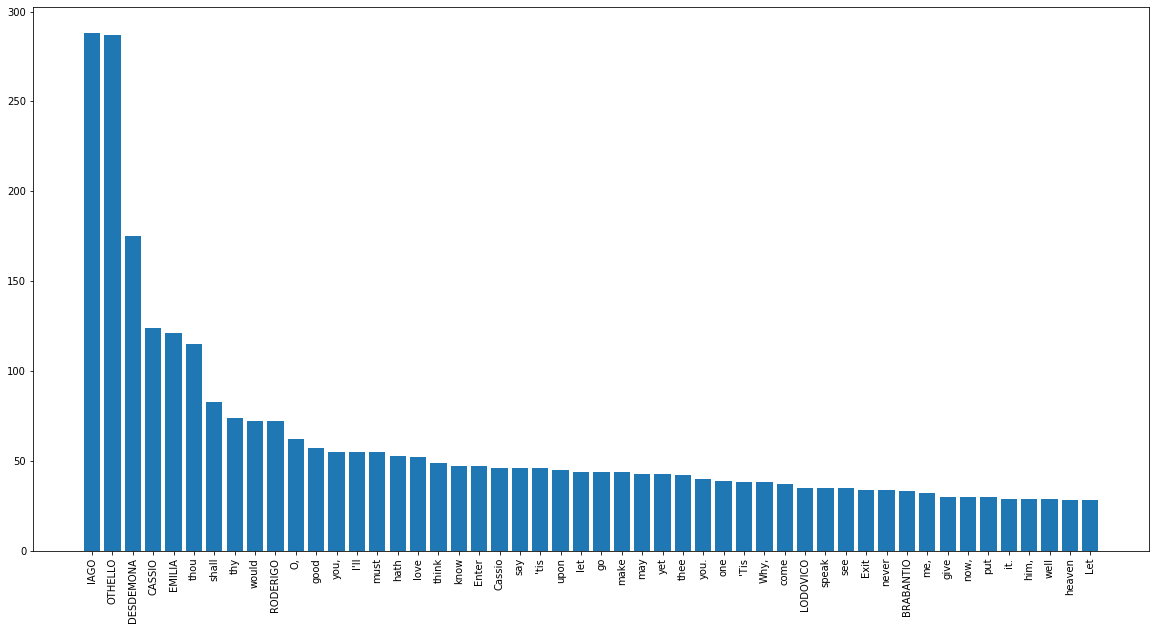

In [63]:
n = 50 # just 50 most popular
wordsPlot = {k: less_words[k] for k in list(less_words)[:n]}

fig, ax = plt.subplots(figsize=(20,10))

ax.bar(range(len(wordsPlot)), list(wordsPlot.values()), align='center')

ax.set_xticks(range(len(wordsPlot)))
ax.set_xticklabels(list(wordsPlot.keys()))

plt.xticks(rotation=90)

plt.show()

So, now we can see that the names of each of the characters are most often repeated, which makes some sort of sense!  We have a different problem though - there is also punctuation included here! 

In some cases it makes sense, like "I'll" vs "Ill", but sometimes it does not, like "him," vs "him".  When and how to take out punctuation can be tricky.

Also, capitalization can be a problem, things like if the word is at the beginning of the sentence.  Let's redo our data modifications with these ideas in mind (see: https://machinelearningmastery.com/clean-text-machine-learning-python/ for even more ideas).

We'll do this using the `nltk` package:

In [66]:
word_tokens = nltk.word_tokenize(" ".join(myWords)) 

In [67]:
word_tokens

['ACT',
 'I',
 'SCENE',
 'I.',
 'Venice',
 '.',
 'A',
 'street',
 '.',
 'Enter',
 'RODERIGO',
 'and',
 'IAGO',
 'RODERIGO',
 'Tush',
 '!',
 'never',
 'tell',
 'me',
 ';',
 'I',
 'take',
 'it',
 'much',
 'unkindly',
 'That',
 'thou',
 ',',
 'Iago',
 ',',
 'who',
 'hast',
 'had',
 'my',
 'purse',
 'As',
 'if',
 'the',
 'strings',
 'were',
 'thine',
 ',',
 'shouldst',
 'know',
 'of',
 'this',
 '.',
 'IAGO',
 "'Sblood",
 ',',
 'but',
 'you',
 'will',
 'not',
 'hear',
 'me',
 ':',
 'If',
 'ever',
 'I',
 'did',
 'dream',
 'of',
 'such',
 'a',
 'matter',
 ',',
 'Abhor',
 'me',
 '.',
 'RODERIGO',
 'Thou',
 "told'st",
 'me',
 'thou',
 'didst',
 'hold',
 'him',
 'in',
 'thy',
 'hate',
 '.',
 'IAGO',
 'Despise',
 'me',
 ',',
 'if',
 'I',
 'do',
 'not',
 '.',
 'Three',
 'great',
 'ones',
 'of',
 'the',
 'city',
 ',',
 'In',
 'personal',
 'suit',
 'to',
 'make',
 'me',
 'his',
 'lieutenant',
 ',',
 'Off-capp',
 "'d",
 'to',
 'him',
 ':',
 'and',
 ',',
 'by',
 'the',
 'faith',
 'of',
 'man',
 ',',
 

Nothing too exciting now, but we'll now filter out stop words:

In [68]:
less_words = [w for w in word_tokens if not w.lower() in stop_words]

In [69]:
less_words

['ACT',
 'SCENE',
 'I.',
 'Venice',
 '.',
 'street',
 '.',
 'Enter',
 'RODERIGO',
 'IAGO',
 'RODERIGO',
 'Tush',
 '!',
 'never',
 'tell',
 ';',
 'take',
 'much',
 'unkindly',
 'thou',
 ',',
 'Iago',
 ',',
 'hast',
 'purse',
 'strings',
 'thine',
 ',',
 'shouldst',
 'know',
 '.',
 'IAGO',
 "'Sblood",
 ',',
 'hear',
 ':',
 'ever',
 'dream',
 'matter',
 ',',
 'Abhor',
 '.',
 'RODERIGO',
 'Thou',
 "told'st",
 'thou',
 'didst',
 'hold',
 'thy',
 'hate',
 '.',
 'IAGO',
 'Despise',
 ',',
 '.',
 'Three',
 'great',
 'ones',
 'city',
 ',',
 'personal',
 'suit',
 'make',
 'lieutenant',
 ',',
 'Off-capp',
 "'d",
 ':',
 ',',
 'faith',
 'man',
 ',',
 'know',
 'price',
 ',',
 'worth',
 'worse',
 'place',
 ':',
 ';',
 'loving',
 'pride',
 'purposes',
 ',',
 'Evades',
 ',',
 'bombast',
 'circumstance',
 'Horribly',
 'stuff',
 "'d",
 'epithets',
 'war',
 ';',
 ',',
 'conclusion',
 ',',
 'Nonsuits',
 'mediators',
 ';',
 ',',
 "'Certes",
 ',',
 "'",
 'says',
 ',',
 "'",
 'already',
 'chose',
 'officer',
 

Make a "table" to transform punctuation out:

In [70]:
#table = str.maketrans('', '', string.punctuation)
#stripped = [w.translate(table) for w in less_words]

Or, just take out any trailing punctuation:

In [71]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [74]:
no_punc_words = []
for word in less_words:
    if word[-1] in string.punctuation:
        word = word[:-1]
    # make sure it wasn't ONLY punctuation
    if len(word) > 0:
        no_punc_words.append(word)

In [75]:
no_punc_words

['ACT',
 'SCENE',
 'I',
 'Venice',
 'street',
 'Enter',
 'RODERIGO',
 'IAGO',
 'RODERIGO',
 'Tush',
 'never',
 'tell',
 'take',
 'much',
 'unkindly',
 'thou',
 'Iago',
 'hast',
 'purse',
 'strings',
 'thine',
 'shouldst',
 'know',
 'IAGO',
 "'Sblood",
 'hear',
 'ever',
 'dream',
 'matter',
 'Abhor',
 'RODERIGO',
 'Thou',
 "told'st",
 'thou',
 'didst',
 'hold',
 'thy',
 'hate',
 'IAGO',
 'Despise',
 'Three',
 'great',
 'ones',
 'city',
 'personal',
 'suit',
 'make',
 'lieutenant',
 'Off-capp',
 "'d",
 'faith',
 'man',
 'know',
 'price',
 'worth',
 'worse',
 'place',
 'loving',
 'pride',
 'purposes',
 'Evades',
 'bombast',
 'circumstance',
 'Horribly',
 'stuff',
 "'d",
 'epithets',
 'war',
 'conclusion',
 'Nonsuits',
 'mediators',
 "'Certes",
 'says',
 'already',
 'chose',
 'officer',
 'Forsooth',
 'great',
 'arithmetician',
 'One',
 'Michael',
 'Cassio',
 'Florentine',
 'fellow',
 'almost',
 'damn',
 "'d",
 'fair',
 'wife',
 'never',
 'set',
 'squadron',
 'field',
 'division',
 'battle'

Looking through this, there are a few other things we might want to take off, like "'d" and we may want to also take off all punctuation and only count lower case words.  We'll ignore those options here, but that is certainly something one could play with!

For now, let's just count:

In [76]:
wordsDict = {}
for word in no_punc_words:
    if word in wordsDict:
        wordsDict[word] += 1
    else:
        wordsDict[word] = 1

Now we'll use the `wordcloud` module to create a wordcloud picture for us:

In [77]:
wordcloud = WordCloud().generate_from_frequencies(wordsDict)

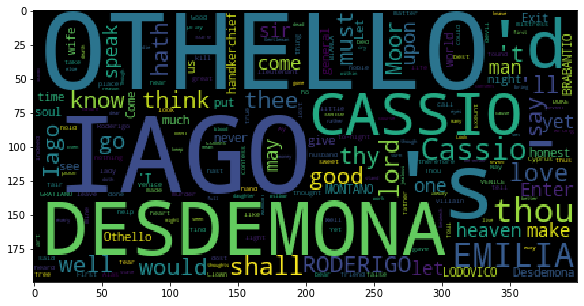

In [78]:
fig, ax = plt.subplots(figsize=(10,5))        

ax.imshow(wordcloud)
        
plt.show()

Note that `stop_words` is just a `set` of words:

In [81]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

This means we can in theory also add to this list a set of our own words that we want to ignore in making our wordcloud.  For example:

In [82]:
stop_words2 = stop_words.copy()

In [87]:
if 'OTHELLO' not in stop_words2:
    stop_words2.add('OTHELLO')

Now we can re-do all the code:

In [88]:
no_oth = []
for word in no_punc_words:
    if word not in stop_words2:
        no_oth.append(word)

In [89]:
wordsDict = {}
for word in no_oth:
    if word in wordsDict:
        wordsDict[word] += 1
    else:
        wordsDict[word] = 1

In [90]:
wordcloud = WordCloud().generate_from_frequencies(wordsDict)

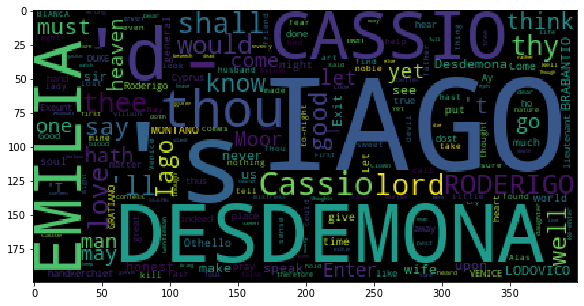

In [91]:
fig, ax = plt.subplots(figsize=(10,5))        

ax.imshow(wordcloud)
        
plt.show()